## Input structure

First, we would like to create a two-layered linear predictive coding model using tensorflow and keras. It seems likely that due to the unique nature of the state-and-weights-estimation, we need to somewhat start at the beginning. It seems to make the most sense to first fit the model using numpy arrays and then transform it to tensorflow tensors.

### Input structure -- Raw

In [1]:
import tensorflow as tf

In [2]:
cifar_data = tf.keras.datasets.cifar10.load_data()

In [3]:
cifar_pictures = cifar_data[0][0]

In [146]:
def get_bw(cifar_pictures):
    return cifar_pictures.mean(axis = 3)

In [147]:
cifar_bw = get_bw(cifar_pictures)

In [148]:
cifar_bw.shape

(50000, 32, 32)

We therefore consider these 50000 different 32x32 black-and-white pictures as our input.

In [25]:
import plotnine as gg
import numpy as np
example = cifar_bw[np.random.choice(range(cifar_bw.shape[0]), size = 1)[0]]

NameError: name 'cifar_bw' is not defined

In [26]:
import pandas as pd
example_p = pd.DataFrame({
    'x': list(range(example.shape[0]))*example.shape[1],
    'y': np.repeat(list(range(example.shape[1])), repeats = example.shape[0]),
    'bw': example.flatten()
})

NameError: name 'example' is not defined

In [151]:
picture = (gg.ggplot(example_p, gg.aes(x = 'x', y = 'y', fill = 'bw')) + 
          gg.geom_tile() + 
          gg.theme_void() + 
          gg.theme(legend_position = 'none') +
          gg.scale_fill_gradient(low = 'white', high = 'black'))

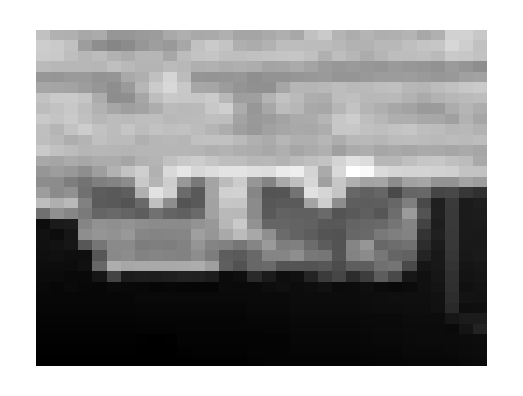

<ggplot: (-9223363272876077326)>

In [152]:
picture

In [162]:
example_color = cifar_pictures[np.random.choice(cifar_pictures.shape[0])]

In [168]:
example_color[:,:,2]

array([[230, 220, 211, ..., 245, 247, 253],
       [236, 227, 216, ..., 252, 253, 255],
       [238, 227, 216, ..., 251, 252, 255],
       ...,
       [155, 149, 143, ..., 162, 162, 161],
       [154, 149, 144, ..., 158, 158, 156],
       [162, 155, 151, ..., 153, 151, 149]], dtype=uint8)

In [169]:
example_color_p = pd.DataFrame({
    'x': list(range(example_color.shape[0]))*example_color.shape[1],
    'y': np.repeat(list(range(example_color.shape[1])), repeats = example_color.shape[0]),
    'r': example_color[:,:,0].flatten(),
    'g': example_color[:,:,1].flatten(),
    'b': example_color[:,:,2].flatten()
})
def hex_2(i):
    hex_2 = hex(i)[2:]
    assert len(hex_2) <= 2
    if len(hex_2) == 1:
        hex_2 = '0' + hex_2
    return str(hex_2)
example_color_p['rgb'] = [
    '#' + hex_2(r) + hex_2(g) + hex_2(b) for r, g, b in zip(example_color_p['r'],
                                                     example_color_p['g'],
                                                     example_color_p['b'])
]

In [171]:
color_picture = (gg.ggplot(example_color_p, gg.aes(x = 'x', y = 'y', fill = 'rgb')) + 
                gg.geom_tile() + 
                gg.theme_void() + 
                gg.theme(legend_position = 'none') + 
                gg.scale_fill_manual(
                    values = {key: key for key in example_color_p['rgb'].unique()}
                ))

In [204]:
data = cifar_pictures[range(10),:,:,:]
image_id = list(np.repeat(list(range(10)),repeats = 32*32))
flattened_x = list(np.repeat(list(range(32)), repeats = 32))*10
flattened_y = list(range(32))*32*10

In [199]:
len(flattened_x)

10240

In [215]:
dataframe = pd.DataFrame({
            'image_id': np.array(image_id),
            'x': np.array(flattened_x),
            'y': np.array(flattened_y),
            'r': data[:,:,:,0].flatten(),
            'g': data[:,:,:,1].flatten(),
            'b': data[:,:,:,2].flatten(),
            'bw': data.mean(axis=3).flatten()
        })
dataframe['rgb'] = np.array([
    '#' + hex_2(r) + hex_2(g) + hex_2(b) for r, g, b in zip(dataframe['r'],
                                                     dataframe['g'],
                                                     dataframe['b'])
])
dataframe['rgb_bw'] = np.array([
            '#' + hex_2(int(bw))*3 for bw in dataframe['bw']
        ])

In [8]:
dataframe.head()

NameError: name 'dataframe' is not defined

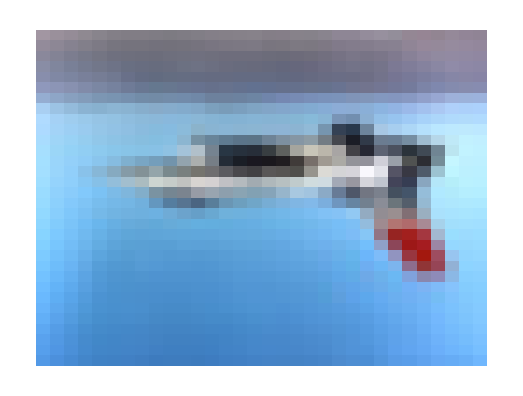

<ggplot: (8763978730237)>

In [172]:
color_picture

### Input structure -- level 1

The same should be extended to a couple of pictures, thus handling a four-dimensional array, which we would like to flatten. Parallely, the labels, though not important for the purpose of the analysis itself, would contribute to an intuition behind these pictures.

In [4]:
import predicode as pc

In [5]:
cifar = pc.ImageData(cifar_pictures)

In [6]:
df = cifar.dataframe(range(10))

In [18]:
df.head()

,image_id,x,y,r,g,b,bw,rgb,rgb_bw
0,0,0,0,59,62,63,61.333333,#3b3e3f,#3d3d3d
1,0,1,0,43,46,45,44.666667,#2b2e2d,#2c2c2c
2,0,2,0,50,48,43,47.000000,#32302b,#2f2f2f
3,0,3,0,68,54,42,54.666667,#44362a,#363636
4,0,4,0,98,73,52,74.333333,#624934,#4a4a4a


In [19]:
labels = cifar_data[0][1]

In [34]:
labels[range(10)]
lab = next(iter(labels[range(10)]))
cifar_labels[int(lab[0])]

'frog'

In [35]:
cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']
df_labels = pd.DataFrame({
    'label': [int(lab[0]) for lab in labels[range(10)]],
    'label_text': np.array([cifar_labels[int(lab[0])] for lab in labels[range(10)]])
})

In [41]:
df_labels.head()

,label,label_text
0,6,frog
1,9,truck
2,9,truck
3,4,deer
4,1,automobile


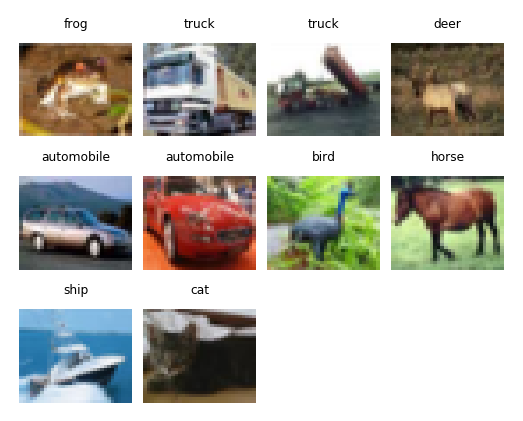

<ggplot: (8794444281927)>

In [39]:
(gg.ggplot(df, gg.aes(x = 'x', y = 'y', fill = 'rgb')) + 
                gg.geom_tile() + 
                gg.theme_void() + 
                gg.theme(legend_position = 'none') + 
                gg.scale_fill_manual(
                    values = {key: key for key in df['rgb'].unique()}
                ) + 
                gg.facet_wrap('image_id', labeller = lambda x: df_labels['label_text'][int(x)]) + 
                gg.scale_y_reverse())

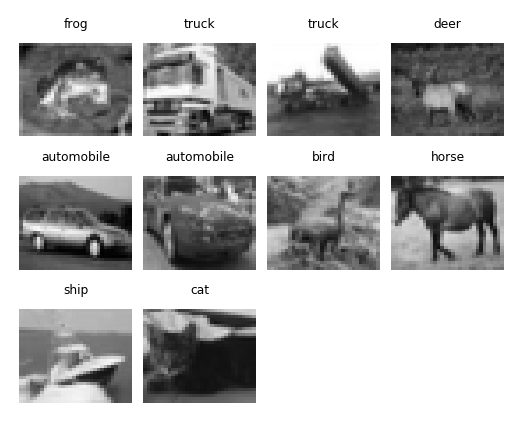

<ggplot: (-9223363242411426409)>

In [40]:
(gg.ggplot(df, gg.aes(x = 'x', y = 'y', fill = 'rgb_bw')) + 
                gg.geom_tile() + 
                gg.theme_void() + 
                gg.theme(legend_position = 'none') + 
                gg.scale_fill_manual(
                    values = {key: key for key in df['rgb_bw'].unique()}
                ) + 
                gg.facet_wrap('image_id', labeller = lambda x: df_labels['label_text'][int(x)]) + 
                gg.scale_y_reverse())

### Input structure -- level 2

In [4]:
import predicode as pc

In [5]:
cifar = pc.Cifar10()

In [6]:
cifar.dataframe(n_random = 12).head()
len(cifar.dataframe(n_random = 12))
cifar.labels.head()

,label,label_text
0,6,frog
1,9,truck
2,9,truck
3,4,deer
4,1,automobile


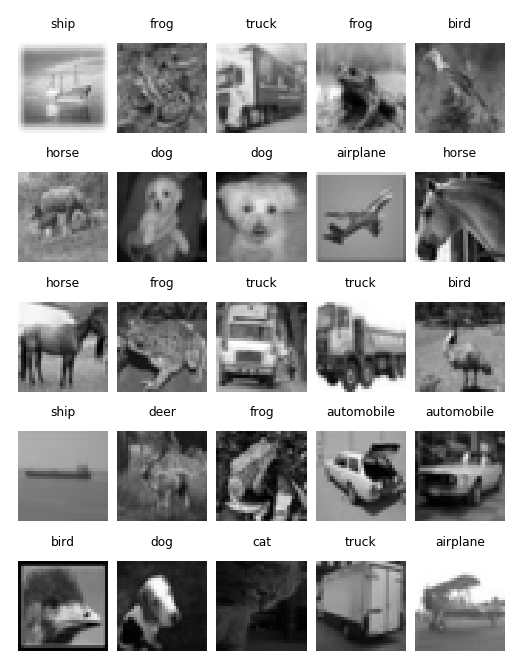

<ggplot: (-9223363309096238588)>

In [7]:
cifar.pictures(n_random = 25)

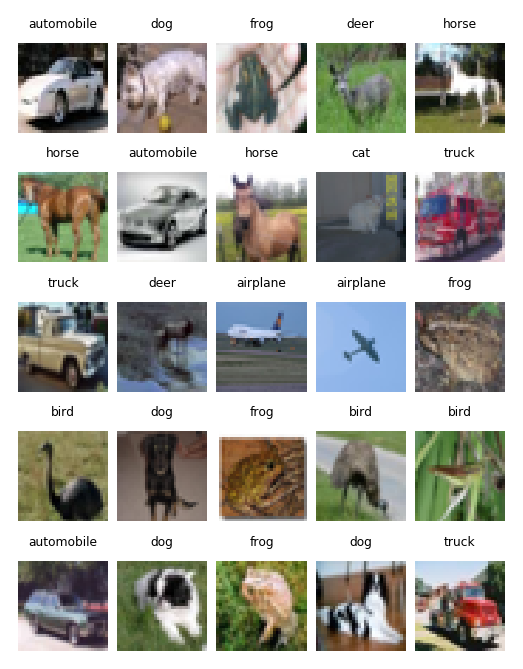

<ggplot: (-9223363309116028777)>

In [8]:
cifar.pictures(n_random = 25, mode = 'color')

### Input shape -- Raw

We first consider one-dimensional receptive fields. For now this extension just concerns black-white pictures, but an extension to colored pictures is planned for later. We may preprocess this data within the predictive coding network, an extension planned for later. For now, however, we consider a simple filter following Srinivasan et al. (1982). This filter simply subtracts the mean of the surrounding nine pixels from the center, yielding a broadly decorrelated signal. The effective receptive field sizes for now thus have a diameter of 3 pixels.

In [1]:
import predicode as pc

In [2]:
circle = [(a,b) for a in [-1,0,1] for b in [-1,0,1] if a != 0 or b != 0]

In [3]:
cifar = pc.Cifar10()

In [4]:
surrounding_data = [cifar.data[range(25),(1+a):(cifar.ydim-1+a),(1+b):(cifar.xdim-1+b),:].astype(float) for a,b in circle]

In [5]:
import functools

In [6]:
predicting_data = (functools.reduce(lambda x,y: x+y, surrounding_data)/8)

In [8]:
cifar2 = pc.Cifar10()
cifar2.data = predicting_data.astype(int)
cifar2.xdim = int(30)
cifar2.ydim = int(30)

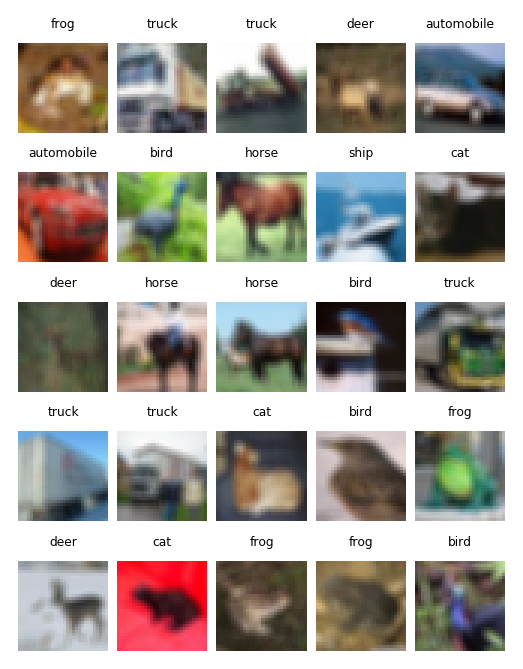

<ggplot: (-9223363290184801336)>

In [9]:
cifar2.pictures(mode = 'color', subset = range(12))

In [7]:
cifar.pictures(mode = 'color', subset = range(12))

MemoryError: 

It is apparent that outside of uniform areas the predictions seem rather occluding. Let's subtract them from the actual data.

In [7]:
filtered_data = cifar.data[range(25),1:-1,1:-1,:]-predicting_data

In [8]:
filtered_data_bw = filtered_data.mean(axis = 3)

In [9]:
import plotnine as gg
cifar3 = pc.Cifar10()
cifar3.data = filtered_data[range(25),:,:,:]
cifar3.xdim = 30
cifar3.ydim = 30

In [10]:
cifar3.dataframe().head()

,image_id,x,y,r,g,b,bw
0,0,0,0,-34.500,-30.250,-25.000,-29.916667
1,0,1,0,-27.000,-24.375,-21.125,-24.166667
2,0,2,0,-19.500,-20.875,-20.750,-20.375000
3,0,3,0,-9.250,-16.625,-19.750,-15.208333
4,0,4,0,2.375,-1.500,-7.750,-2.291667


/home/sflippl/.local/lib/python3.7/site-packages/plotnine/scales/scale.py:89: UserWarning: scale_fill_gradient2 could not recognise parameter `middle`
  warn(msg.format(self.__class__.__name__, k))


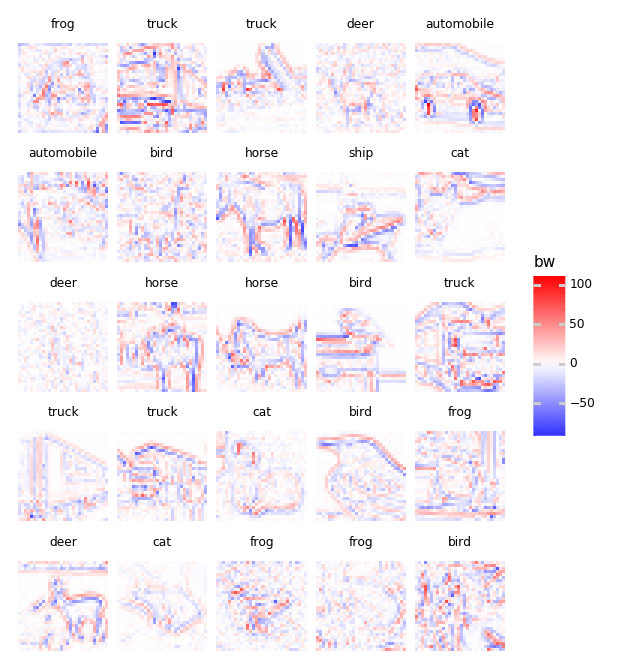

<ggplot: (-9223363244006681228)>

In [11]:
(gg.ggplot(cifar3.dataframe(), gg.aes(x = 'x', y = 'y', fill = 'bw')) + 
    gg.geom_tile() + 
    gg.theme_void() + 
    gg.scale_fill_gradient2(low = 'blue', middle = 'white', high = 'red') + 
    gg.coord_fixed() + 
    gg.scale_y_reverse() + 
    gg.facet_wrap('image_id', labeller = cifar3.labeller))

The receptive field now grabs the two diagonals, the vertical and the horizontal image data with a width of 7.

In [23]:
horizontal = np.concatenate([filtered_data_bw[:,row,col:(col+7)] for row in range(30) for col in range(30-7)])
vertical = np.concatenate([filtered_data_bw[:,row:(row+7),col] for row in range(30-7) for col in range(30)])
diagonal = np.concatenate([filtered_data_bw[:,row:(row+7),col:(col+7)].diagonal(axis1=1, axis2=2) for row in range(30-7) for col in range(30-7)])
antidiagonal = np.concatenate([filtered_data_bw[:,row:(row+7),(col+7):col].diagonal(axis1=1,axis2=2) for row in range(30-7) for col in range(30-7)])

In [5]:
import numpy as np

In [44]:
horizontal_corr = np.corrcoef(horizontal.transpose())

In [45]:
horizontal_corr_total = np.array([horizontal_corr.diagonal(offset = k).mean() for k in range(-6,7)])

In [46]:
horizontal_corr_total

array([0.05549752, 0.06423125, 0.08650541, 0.13159437, 0.01298298,
       0.31912945, 1.        , 0.31912945, 0.01298298, 0.13159437,
       0.08650541, 0.06423125, 0.05549752])

In [47]:
vertical_corr = np.corrcoef(vertical.transpose())

In [48]:
vertical_corr_total = np.array([vertical_corr.diagonal(offset = k).mean() for k in range(-6,7)])

In [50]:
vertical_corr_total

array([ 0.03492659,  0.02014823,  0.03566975,  0.07225417, -0.04357569,
        0.3347483 ,  1.        ,  0.3347483 , -0.04357569,  0.07225417,
        0.03566975,  0.02014823,  0.03492659])

In [7]:
cifar_data_bw = cifar.data[range(25)].mean(axis = 3)
horizontal = np.concatenate([cifar_data_bw[:,row,col:(col+7)] for row in range(32) for col in range(32-7)])
vertical = np.concatenate([cifar_data_bw[:,row:(row+7),col] for row in range(32-7) for col in range(32)])
diagonal = np.concatenate([cifar_data_bw[:,row:(row+7),col:(col+7)].diagonal(axis1=1, axis2=2) for row in range(32-7) for col in range(32-7)])
antidiagonal = np.concatenate([cifar_data_bw[:,row:(row+7),(col+7):col].diagonal(axis1=1,axis2=2) for row in range(32-7) for col in range(32-7)])

In [10]:
horizontal_corr = np.corrcoef(horizontal.transpose())
horizontal_corr_total = np.array([horizontal_corr.diagonal(offset = k).mean() for k in range(0,7)])
horizontal_corr_total

array([1.        , 0.92458861, 0.81903478, 0.75225189, 0.70010622,
       0.65508057, 0.6156605 ])

In [11]:
vertical_corr = np.corrcoef(vertical.transpose())
vertical_corr_total = np.array([vertical_corr.diagonal(offset = k).mean() for k in range(0,7)])
vertical_corr_total

array([1.        , 0.9055096 , 0.75148157, 0.63272611, 0.535527  ,
       0.45791709, 0.39690063])

In [12]:
diagonal_corr = np.corrcoef(diagonal.transpose())
diagonal_corr_total = np.array([diagonal_corr.diagonal(offset = k).mean() for k in range(0,7)])
diagonal_corr_total

array([1.        , 0.84370196, 0.6589948 , 0.54220522, 0.45784406,
       0.3845604 , 0.32765185])

Turns out, everything is a bit more complicated than anticipated. Specifically, preprocessing needs to be thought through more critically. This is not necessary for the predictive coding algorithm writing itself, so this will happen with an artifical dataset created in 02.